<a href="https://colab.research.google.com/github/crew-guy/Data-Science-with-tableau/blob/main/tf_neural_net_classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to classification neural networks with TensorFlow

A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

![image](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/tf-classification.png)

In [200]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

## Creating data to view & fit

In [201]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [202]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand now.....let's visualize it

In [203]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


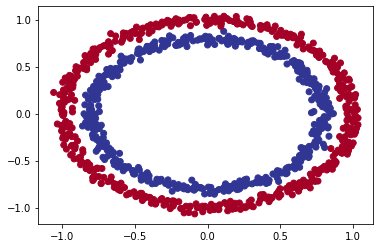

In [204]:
# Visualize as a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input & output shapes

In [205]:
# Length of sample size
len(y)

1000

In [206]:
# Shapes of data
X.shape, y.shape

((1000, 2), (1000,))

In [207]:
# Getting the first element of features & labels
y[0], X[0]

(1, array([0.75424625, 0.23148074]))

## Building a basic neural network classification model

In [208]:
# Preparing the data - using scikit learn for training & test set split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [209]:
## 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

## 2. Compiling a model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics = ["accuracy"]
)


## 3. Training a model
history = model.fit(X_train, y_train, epochs=100,verbose=0)

In [210]:
# Evaluating our model against test data
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4727


[0.6986377239227295, 0.4727272689342499]

In [211]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [212]:
model_1_preds = model.predict(X_train)

21/21 [==============================] - 0s 2ms/step


In [213]:
# This function was inspired from 2 resources
# https://cs231n.github.io/neural-networks-case-study/
# https://madewithml.com/courses/foundations/data-quality/#inference_1


def plot_decision_boundary(model, X,y):
    """
    Create a decision boundary for a model predicting on X
    """

    # Get the boundaries along each axes for creating a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1

    # Here - yy has nothing to do with the labels y & is actually just the limits on the X2 feature in the feature vector X
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    # np.meshgrid - Return coordinate matrices from coordinate vectors
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        # In this dataset but, multiclass classification won't happen as y only has 2 values - 0 & 1
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 2ms/step
doing binary classification


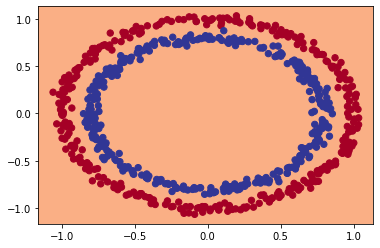

In [214]:
# Checkout the decisions that our model is making
plot_decision_boundary(
    model=model,
    X=X_train,
    y=y_train
)

## The missing piece - non-linearity

Our current model can predict straight lines with somewhat good accuracy (to check this, just create a model with a regression loss function & visualize train, test & predicted values).plot_decision_boundary
However, we actually want it to be a good classifier. Thus we need a "*non-linear activation function*" when we're training


💡 Trick - try to mimick your dataset in [TensorFlow Playground](https://playground.tensorflow.org/) and tune hyperparameters till you start seeing a good decision boundary
Then, just recreate a model with similar hyperparameters & visualize the decision boundary

In [215]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [216]:
model_2.evaluate(X_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9818


[0.050243522971868515, 0.9818181991577148]

313/313 [==============================] - 1s 3ms/step
doing binary classification


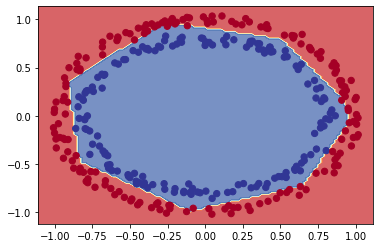

In [217]:
plot_decision_boundary(model_2, X_test, y_test)

🔑 **Note** : The combination of **linear** (straight lines) & non-linear(non-straight lines) functions is one of the key fundamentals of neural networks  

## Analyzing activation functions & their effects

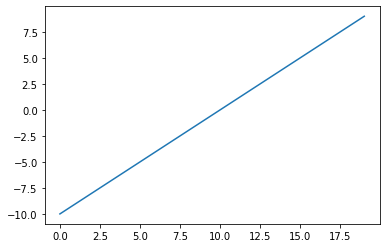

In [218]:
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
plt.plot(A)

In [219]:
# Let's start by replicating sigmoid(x) = 1/1 + exp(-x)
def sigmoid(x):
    return 1/(1+ tf.exp(-x))


# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

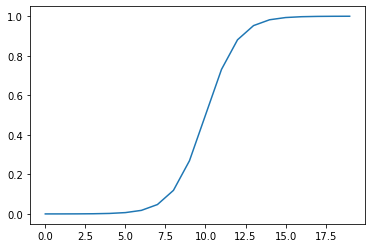

In [220]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

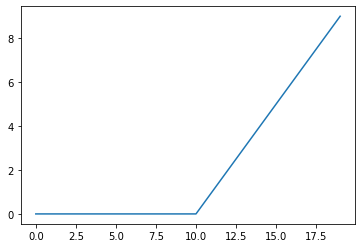

In [221]:
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(A))

In [222]:
# Let's try linear activation function - does it even change the input
A_linear = tf.keras.activations.linear(A)

A_linear == A

# No change on A - as specified in the docs, here at - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear - returns "the input, unmodified"

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

🔑 **Note** - Important cheat sheet for understanding activation functions - [Cheat Sheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

![Transformations by activation functions](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/non-linearity.png)

In [223]:
### Evaluating & improving our classification

# Accelerate training by increasing value of learning rate

# Create the same model as the previous mode
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Pretty fucking awesome - just by increasing learning rate to 0.01, we got to 99.25% accuracy within 25 epochs
history = model_3.fit(X_train, y_train, epochs=25)

Epoch 1/25
21/21 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.5119
Epoch 2/25
21/21 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5313
Epoch 3/25
21/21 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5896
Epoch 4/25
21/21 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.6209
Epoch 5/25
21/21 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6791
Epoch 6/25
21/21 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6597
Epoch 7/25
21/21 [==============================] - 0s 6ms/step - loss: 0.5898 - accuracy: 0.7910
Epoch 8/25
21/21 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.8149
Epoch 9/25
21/21 [==============================] - 0s 7ms/step - loss: 0.4815 - accuracy: 0.9015
Epoch 10/25
21/21 [==============================] - 0s 5ms/step - loss: 0.4208 - accuracy: 0.9104
Epoch 11/25
21/21 [

In [224]:
model_3.evaluate(X_test, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.1086 - accuracy: 0.9727


[0.10858908295631409, 0.9727272987365723]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


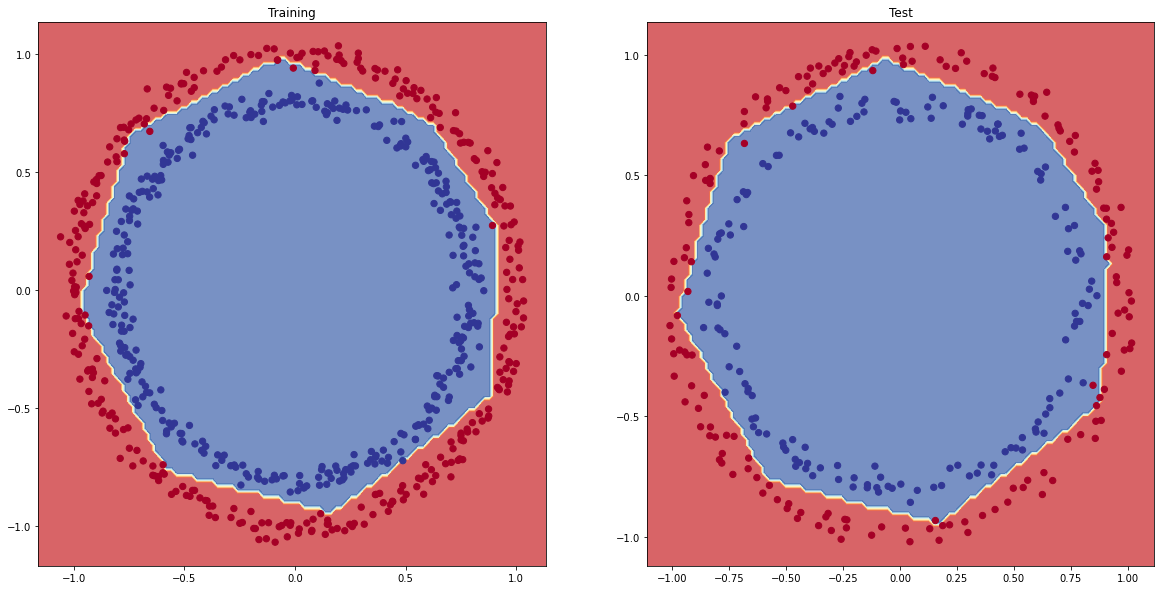

In [225]:
# Plot the decision boundaries for the training and test data set

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

# The subplot() function takes three arguments that describes the layout of the figure.
# The layout is organized in rows and columns, which are represented by the first and second argument.
# The third argument represents the index of the current plot.

## Plot loss (or training) curves

We can use the history object of Tensorflow to plot the model's loss curves

In [226]:
history_df = pd.DataFrame(history.history)

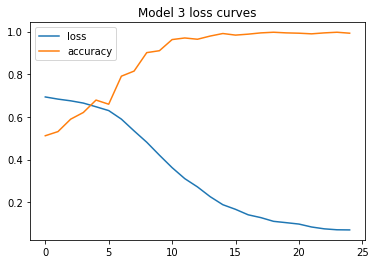

In [227]:
history_df.plot(title="Model 3 loss curves")

🔑 **Note** : For many problems, value of the loss function decreasing means that our model is improving (predictions are getting closer to ground truths)

## Finding the best learning rate

To find the ideal learning rate (the learning rate for which the loss decerases the most during training) we follow these steps:
1. A learning rate **callback** - You can think of a callback as an extra piece of functionality that we add to the model, while it is training
2. A model
3. A modified loss-curves plot

In [228]:
# Set a  random seet
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# 3. Set a callback learning_rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))


# 4. Train the model, using our custom callback
history_4 = model_4.fit(
    X_train,
    y_train,
    callbacks=[lr_scheduler],
    epochs=100,
    verbose=0
)

In [229]:
history_4_df = pd.DataFrame(history_4.history)

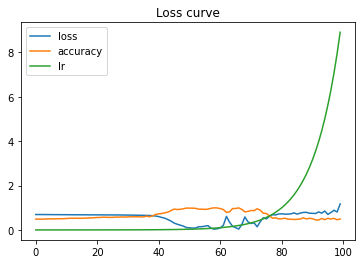

In [230]:
history_4_df.plot(title="Loss curve")

Text(0.5, 1.0, 'Learning rate vs. Loss')

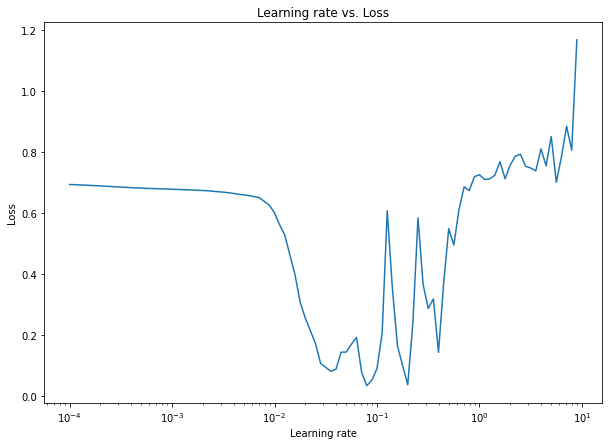

In [231]:
# Zooming in, into this plot, to understand that for which learning rate is the loss decreasing the fastest
lrs = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
# semilogx - This is just a thin wrapper around plot which additionally changes the x-axis to log scaling. All of the concepts and parameters of plot can be used here as well.
plt.semilogx(lrs, history_4_df["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title('Learning rate vs. Loss')

![Ideal learning rate](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/ideal-lr.png)

In [232]:
# Thus, we realised that the ideal learning rate lies in the range of 0.01 to 0.1
# Setting the learning rate to 0.3, let's observe how fast does our accuracy increase in our history

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=["accuracy"]
)

# 3. Train the model
history_5 = model_5.fit(X_train, y_train, epochs=10,verbose=0)

In [233]:
history_5_df = pd.DataFrame(history_5.history)
history_5_df

,loss,accuracy
0,0.680602,0.552239
1,0.659213,0.679105
2,0.616352,0.689552
3,0.549898,0.749254
4,0.479172,0.789552
5,0.362632,0.898507
6,0.264141,0.953731
7,0.183409,0.989552
8,0.122100,0.997015
9,0.096794,0.995522


Thus, as we can see above, right from the 7th epoch, we are getting >98% accuracy and that's pretty freaking awesome since now, to get a really high accuracy, we need to train 10x lesser

In [234]:
# Model 5 was trained for 10 epochs. (10% of the training time of Model 4). Still the accuracy is awesome
model_5.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9848


[0.10780736804008484, 0.9848484992980957]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


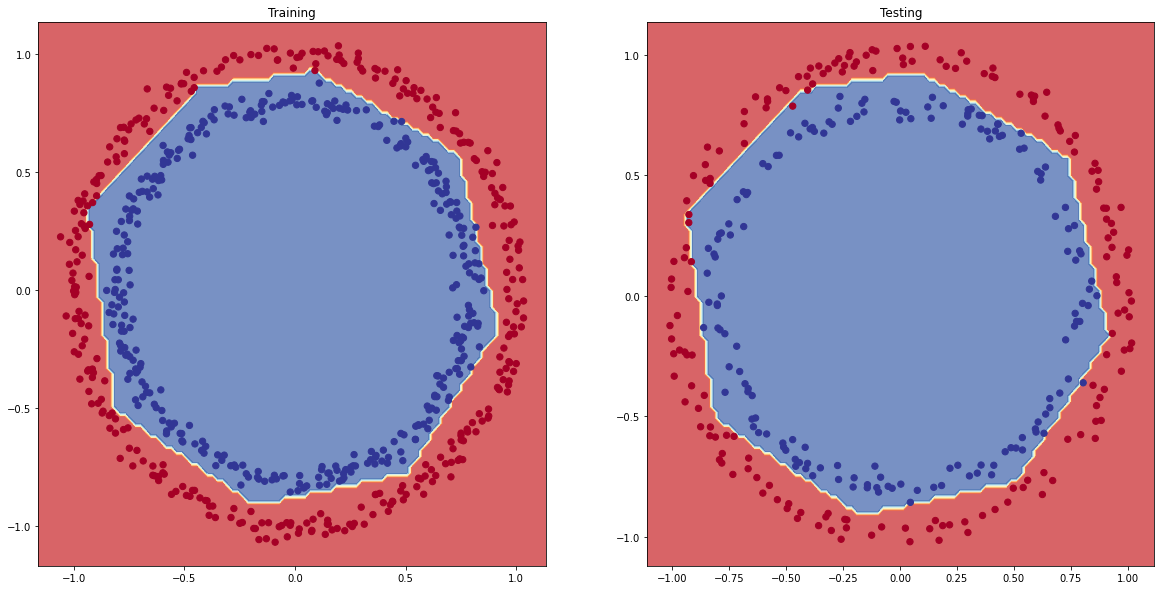

In [235]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_5, X_test, y_test)

## Other Classification Evaluation methods

![Classification evaluation methods](https://testbucket1841.s3.ap-south-1.amazonaws.com/tf-ml-course-udemy/classify-eval-methods.png)


Precision/recall tradeoff - If you increase precision, it will reduce recall & vice-versa


Thus, here are some of the other classification evaluation methods & metrics we must be familiar with

* Accuracy
* Precision
* Recall
* F1_score
* Confusion matrix
* Classification report (scikit-learn

In [236]:
model_5_predictions= model_5.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [237]:
binary_preds = tf.squeeze(np.round(model_5_predictions))
binary_preds.shape

TensorShape([330])

In [238]:
import sklearn.metrics as skm

# precision, recall, fbeta_score, support = skm.precision_recall_fscore_support(y_test, binary_preds)
loss, accuracy = model_5.evaluate(X_test, y_test)
precision = skm.precision_score(y_test, binary_preds)
recall = skm.recall_score(y_test, binary_preds)
f1_score = skm.f1_score(y_test, binary_preds)
c_report = skm.classification_report(y_test, binary_preds)
precision, recall, f1_score, accuracy, loss
# c_report

11/11 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9848


(0.9748427672955975,
 0.9935897435897436,
 0.9841269841269842,
 0.9848484992980957,
 0.10780736804008484)

In [239]:
#### Creating a confusion matrix
CM = skm.confusion_matrix(y_test, binary_preds)

🔑 **Note** : The confusion matrix we're about to write is a remix of scikit-learn's plot confusion matrix - [Reference Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

In [313]:
# Prettifying our confusion matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    CM = skm.confusion_matrix(y_true, y_pred)

    # Normalizing the confusion matrix
    CM_norm = CM.astype(float)/np.sum(CM, axis=1)
    n_classes = CM_norm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(CM, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(CM.shape[0])


    # Label the axes
    ax.set(
        title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels,
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(30)

    # Set the threshold for different colors
    threshold = (CM.max() + CM.min())/2

    # Plot the text on each cell
    # Basically itertools will help us create paired values of elements in each array
    for i,j in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
        plt.text(j, i, f"{CM[i, j]} ({CM_norm[i, j]*100:.1f}%)",
        horizontalalignment = "center",
        color="white" if CM[i, j] > threshold else "black",
        size=15
    ),

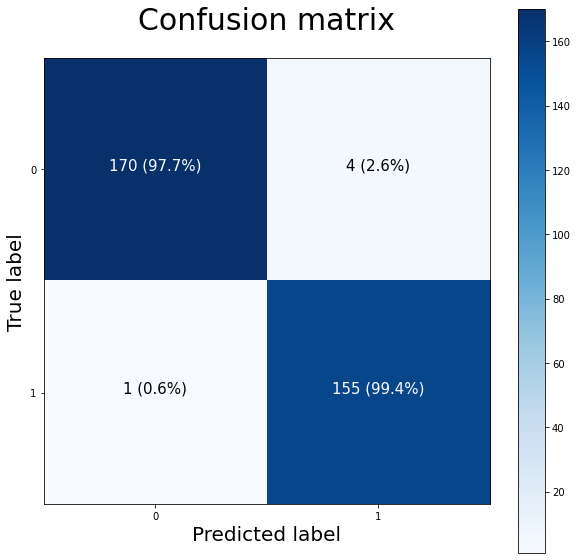

In [241]:
plot_confusion_matrix(y_test, binary_preds)

# Working with a larger example (multiclass classification)


When you have more than 2 classes as an option it's known as multiclass classification

Here, we are going to build a neural network to classify images of different items of clothing using the fashion MNIST dataset

In [242]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training & test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [243]:
# Show the 1st training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [244]:
# Check the shape of the data & the label
train_data[0].shape, train_labels[0].shape

((28, 28), ())

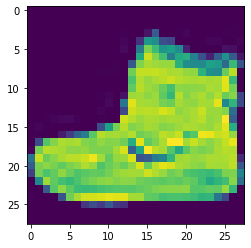

In [245]:
# Check out what the first sample & data looks like
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [246]:
train_labels[0]

9

In [247]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["Tshirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)


10

Text(0.5, 1.0, 'Bag')

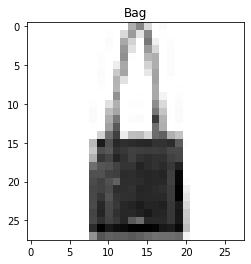

In [248]:
# Create a simple image labelling function
index_of_choice = 200
# We choose a grayscale colormap for each image
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

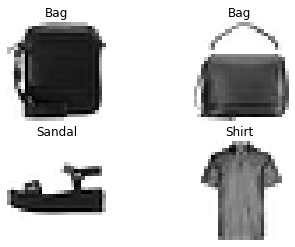

In [251]:
# Plot multiple random images of fashion MNIST
import random
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building a multi-class classification model

We can reuse a lot of steps that we followed while building our Binary classifier model, except for tweaking a few things listed here:
* Input shape - Shape of an image - 28*28
* Output shape - Number of possible classes - 10
* Output activation function - Softmax
* Loss function - tf.keras.CategoricalCrossentropy
    If your labels are one-hot encoded then use CategoricalCrossentropy() and if they are integers, then, use SparseCategoricalCrossentropy()

In [271]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

# 2. Compile the model
model.compile(
    # CategoricalCrossentropy() is used as the labels are one-hot encoding & not integers
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics = ["accuracy"]
)

# 3. Train the model
non_norm_history = model.fit(
    train_data, 
    tf.one_hot(train_labels, depth=10), 
    epochs = 10, 
    # The model validates its predictions on the validation data so we also see val_loss & val_accuracy metrics' values when we're training
    validation_data=(test_data, tf.one_hot(test_labels,depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3468 - accuracy: 0.1011 - val_loss: 2.3079 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3068 - accuracy: 0.0992 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3069 - accuracy: 0.0991 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3066 - accuracy: 0.1005 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3065 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3062 - accuracy: 0.0997 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3066 - accuracy: 0.0998 - val_loss: 2.3053 - val_accuracy:

In [265]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 28, 4)             116       
                                                                 
 dense_133 (Dense)           (None, 28, 4)             20        
                                                                 
 dense_134 (Dense)           (None, 28, 10)            50        
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [272]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_147 (Dense)           (None, 4)                 3140      
                                                                 
 dense_148 (Dense)           (None, 4)                 20        
                                                                 
 dense_149 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the range 0 to 1

In [273]:
# We can get our training & testing data between 0 & 1 by dividing the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min & max values of the scaled training data
train_data_norm.max(), train_data_norm.min() 

(1.0, 0.0)

In [277]:
# Now our data is normalized, let's build a model to find pattern

# Set a random seed
tf.random.set_seed(42)


# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Train the model
norm_history = model_2.fit(
    train_data_norm,
    train_labels,
    epochs = 10,
    validation_data = (
        test_data_norm,
        test_labels
    )
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

> 🔑 **Note**: Neural networks tend to prefer data in numerical form as well as scaled/normalized form(numbers b/w 0 & 1)

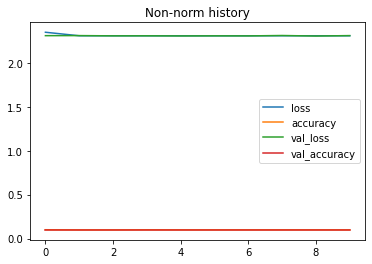

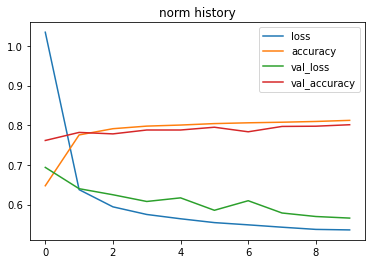

In [279]:
### Evaluating model performance
non_norm_history_df = pd.DataFrame(non_norm_history.history)
norm_history_df = pd.DataFrame(norm_history.history)

non_norm_history_df.plot(title="Non-normalized data")
norm_history_df.plot(title="Normalied data")

> 🔑  **Note** : The same model with even *slightly* different data can produce *drastically* different results. So when you're comparing models, it's important to compare them on the same criteria (eg: same architecture, diff data OR same data, different architecture)

### Finding the best learning rate

In [286]:
# Set a random seed
tf.random.set_seed(69)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Defining a learning rate callback
lr_schedulers = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# 2. Compile a model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Setting number of epochs
num_epochs = 40


# 3. Train a model

norm_history_2 = model_3.fit(
    train_data_norm,
    train_labels,
    callbacks=[lr_schedulers],
    validation_data=(test_data_norm, test_labels),
    epochs=num_epochs
)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0829 - accuracy: 0.5921 - val_loss: 0.7675 - val_accuracy: 0.7104 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7071 - accuracy: 0.7439 - val_loss: 0.7136 - val_accuracy: 0.7399 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6618 - accuracy: 0.7646 - val_loss: 0.6812 - val_accuracy: 0.7650 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6426 - accuracy: 0.7730 - val_loss: 0.6859 - val_accuracy: 0.7569 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6337 - accuracy: 0.7755 - val_loss: 0.6660 - val_accuracy: 0.7669 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6281 - accuracy: 0.7764 - val_loss: 0.6583 - val_accuracy: 0.7686 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Loss vs Learning rate')

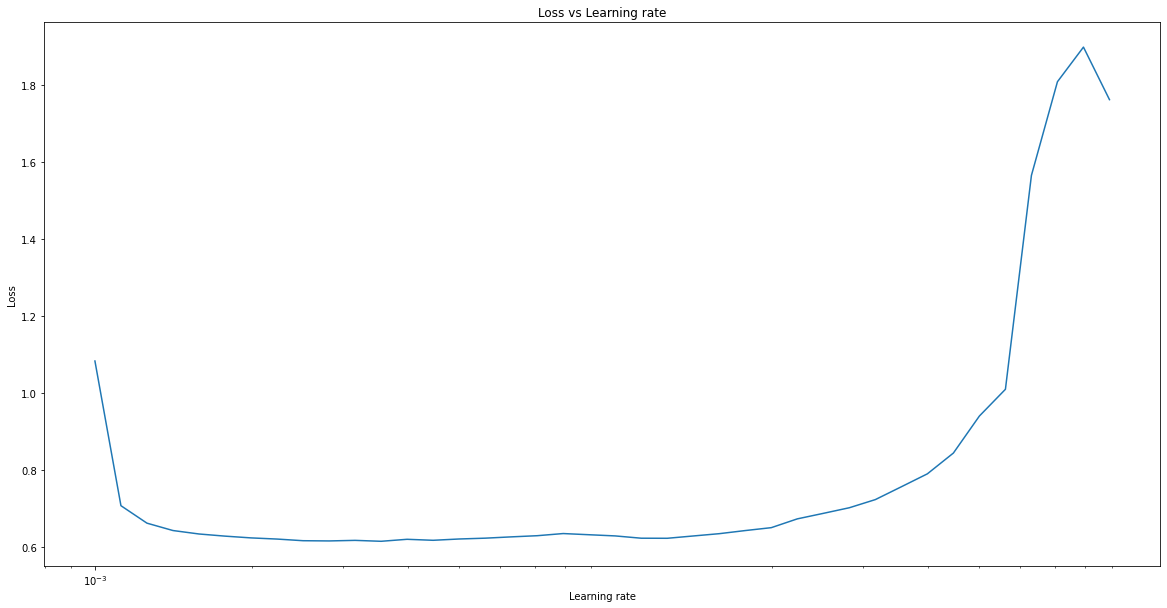

In [287]:
# Plotting the "Learning Rate Decay Curve"

norm_history_2_df = pd.DataFrame(norm_history_2.history)
lrs = 1e-3*10**(tf.range(num_epochs)/20)
plt.figure(figsize = (20,10))
plt.semilogx(lrs, norm_history_2_df["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning rate")

Thus, the ideal learning_rate seems to be - 0.001

In [293]:
# Retraining the model with the ideal learning rate

# Set the seed
tf.random.set_seed(70)

# Set the obtained optimized-learning-rate
optimized_learning_rate = 0.001

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=optimized_learning_rate),
    metrics=["accuracy"]
)

# 3. Train the model
model_4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.4490 - accuracy: 0.4315 - val_loss: 0.9439 - val_accuracy: 0.5974
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8694 - accuracy: 0.6604 - val_loss: 0.8377 - val_accuracy: 0.6987
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7990 - accuracy: 0.7049 - val_loss: 0.8077 - val_accuracy: 0.7113
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7569 - accuracy: 0.7228 - val_loss: 0.7808 - val_accuracy: 0.7123
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7338 - accuracy: 0.7324 - val_loss: 0.7661 - val_accuracy: 0.7302
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7197 - accuracy: 0.7382 - val_loss: 0.7495 - val_accuracy: 0.7349
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7076 - accuracy: 0.7449 - val_loss: 0.7311 - val_accuracy

## Evaluating our multi-class classification model

To evaluate our multi-class classification model, we can do the following:
* Evaluate its performance through other evaluation methods & metrics (such as confusion matrix)
* Assess its predictions (through visualizations)
* Improve its results (by hyperparameter tuning)

> 🔑 **Note** : Remember to make predictions on the same kind of data that your model was trained on (eg: if your model was trained on normalized data, then your predictions should also be made on the same data)

In [295]:
model_4_predictions = model_4.predict(test_data_norm)
model_4_predictions

313/313 [==============================] - 1s 3ms/step


array([[1.0177404e-06, 3.2761147e-13, 2.0401971e-09, ..., 1.1452041e-01,
        2.4949257e-08, 7.4283803e-01],
       [2.8885115e-04, 9.4550975e-25, 8.1742567e-01, ..., 4.0411030e-32,
        7.3064558e-07, 1.3832080e-08],
       [5.2917316e-05, 9.8589814e-01, 2.5644769e-07, ..., 1.9077428e-13,
        4.4372974e-11, 1.2576913e-09],
       ...,
       [5.8129504e-03, 1.2605337e-05, 3.9668720e-02, ..., 2.7697135e-03,
        4.6025160e-01, 2.6476811e-04],
       [8.3875588e-05, 9.8072195e-01, 5.4758493e-07, ..., 1.1206239e-12,
        1.7833844e-10, 2.9762304e-09],
       [7.8403835e-05, 1.9755255e-07, 1.0697887e-06, ..., 2.8355032e-01,
        7.9900092e-06, 2.9019356e-02]], dtype=float32)

In [298]:
predictions = tf.argmax(model_4_predictions, axis=1)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, 0)

In [308]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_true=test_labels,
    y_pred=predictions
)

array([[648,   2,  16, 195,  15,   1, 117,   2,   3,   1],
       [  3, 929,   0,  53,   4,   0,  11,   0,   0,   0],
       [ 20,   0, 447,  35, 220,   0, 272,   0,   6,   0],
       [ 18,  29,   1, 842,  26,   0,  80,   0,   4,   0],
       [  1,   0,  86,  37, 695,   0, 160,   1,  20,   0],
       [  0,   0,   0,   0,   0, 903,   1,  54,   0,  42],
       [123,   0, 113, 121, 275,   1, 357,   0,  10,   0],
       [  0,   0,   0,   0,   0,  49,   0, 901,   3,  47],
       [  2,   0,   2,  13,  62,   3,   8,  26, 884,   0],
       [  3,   0,   0,   0,   0,  21,   1,  41,   0, 934]])

In [310]:
class_names

['Tshirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

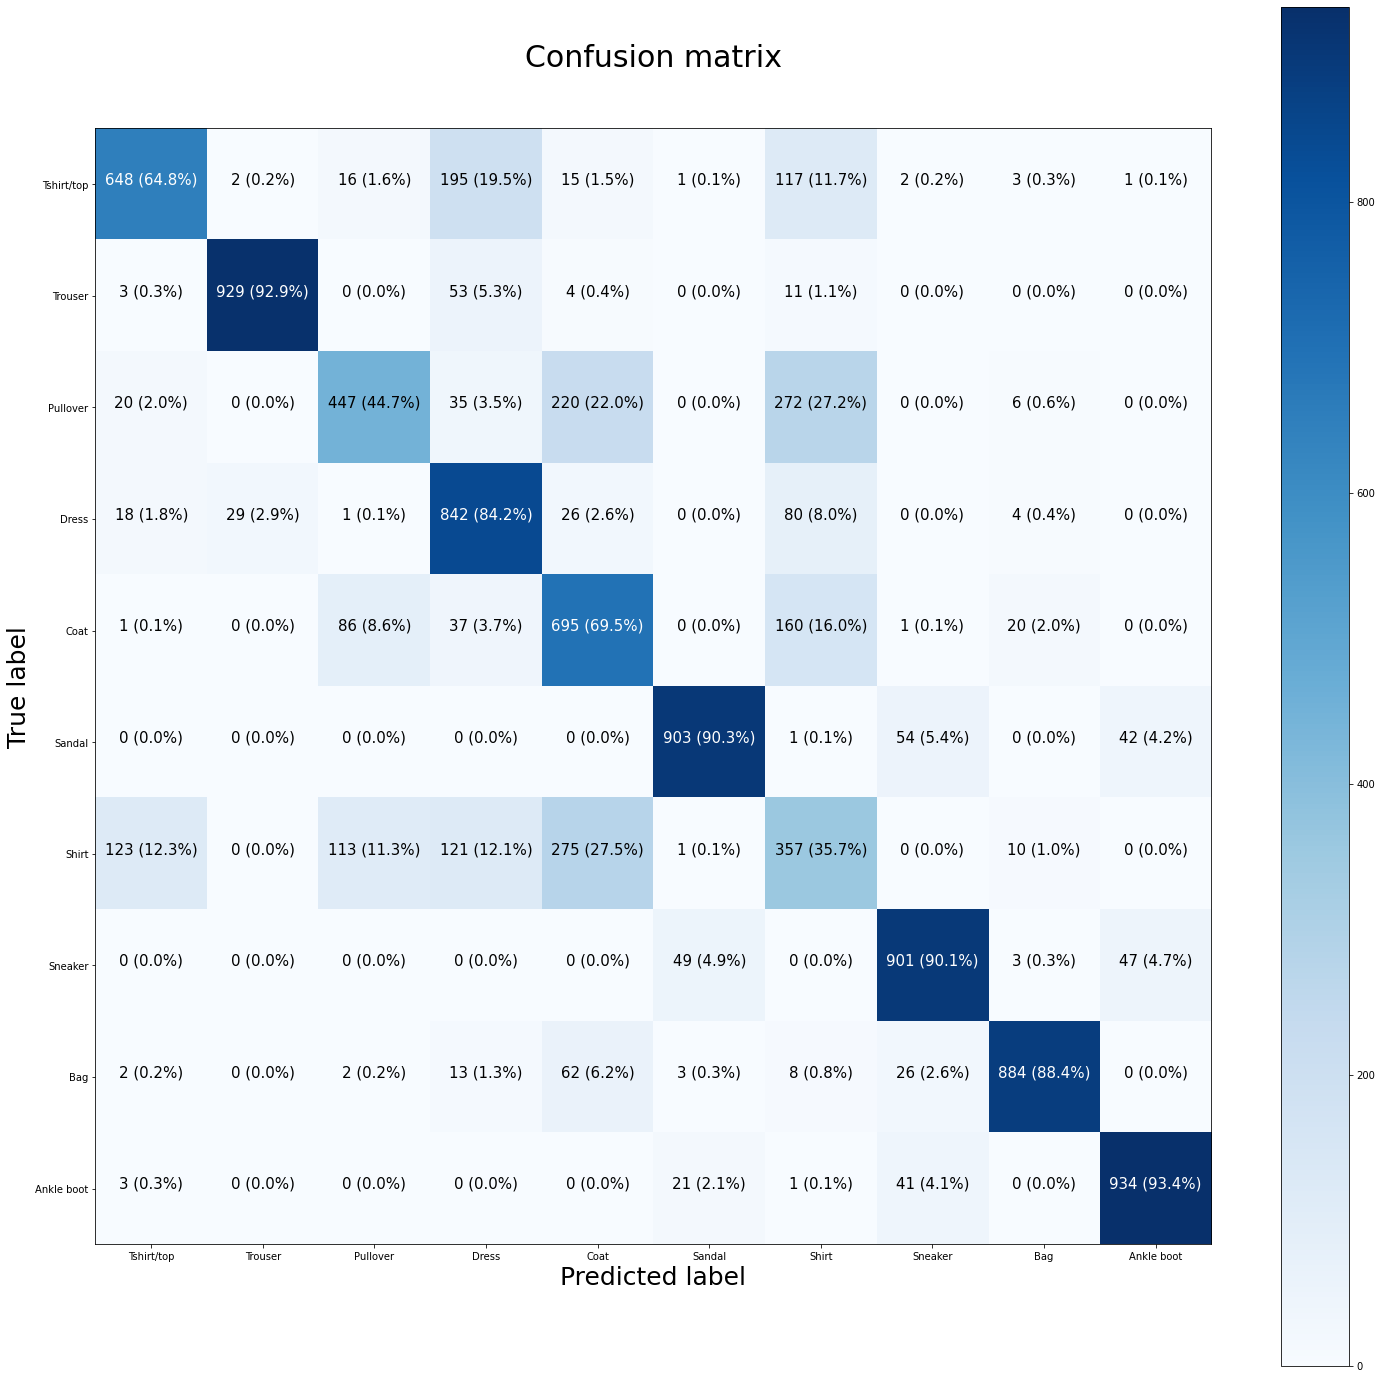

In [314]:
plot_confusion_matrix(
    test_labels, 
    predictions, 
    classes=class_names, 
    figsize=(25,25), 
    text_size=25
)

>  🔑 **Note** : Often, when working with images, it is always more useful to visualize as much as possible to develop a further understanding of the data & the inputs & outputs of your models

How about we create a fun little function for:

* Select & show a random image
* Predict the label for this image
* Label the plot with the truth label & the predicted label

In [330]:
import random

def predict_random_image(model, images, true_labels, classes):
    # Pick a random image
    i = random.choice(range(len(images)))
    target_image = images[i]

    # Make a prediction
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_value = class_names[pred_probs.argmax()]
    true_value = class_names[true_labels[i]]

    # Format color of text based on accuracy
    if pred_value==true_value:
        color = "green"
    else:
        color = "red"

    # Plot the image & the label
    plt.imshow(target_image, cmap=plt.cm.binary)
    plt.title(f"Truth value: {true_value}, Predicted value:{pred_value}", color=color)
    plt.xlabel("Pred: {} {:2.0f}%, (True: {})".format(pred_value, 100*tf.reduce_max(pred_probs), true_value),color=color)

1/1 [==============================] - 0s 47ms/step


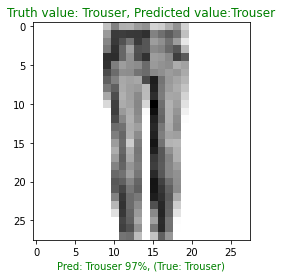

In [331]:
predict_random_image(
    model_4,
    test_data_norm,
    test_labels,
    class_names
)

## What patterns is our model learning?

In [333]:
# Find the lyaers of our most recent model
model_4.layers

In [334]:
# Extract a particular layer
model_4.layers[1]

In [335]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.42721704, -0.60908735,  0.5805506 , -0.49137074],
        [-0.89654374, -0.8195646 ,  0.779792  ,  0.7040855 ],
        [-0.36340287, -0.8175012 ,  1.0170617 , -0.00254289],
        ...,
        [-0.1855122 , -0.3031775 , -0.52369124,  0.508623  ],
        [-0.18400152, -0.44100407, -0.22201668,  0.3983026 ],
        [ 0.47669196, -0.518063  ,  0.22821417, -0.37289283]],
       dtype=float32), (784, 4))

In [337]:
# Now lets checkout the biases vector
biases, biases.shape

(array([ 1.6792763 , -1.1954945 , -0.63111854,  0.4355723 ], dtype=float32),
 (4,))

Every neuron has a basis vector. Each of these is paired with a weight matrix

The bias vector gets initialized as zeros (atleast in the case of TensorFlow Dense Layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

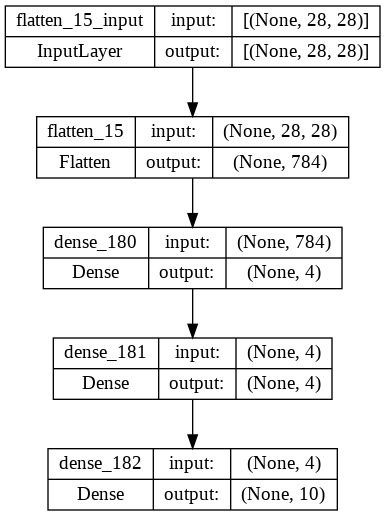

In [349]:
tf.keras.utils.plot_model(model=model_4,show_shapes=True)